In [1]:
from scipy.stats import genextreme as gev
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio
from scipy.optimize import curve_fit
import dpaleo

# Generalized Extreme Value Model for Surface Displacement Distribution 

If you find this work useful, please cite:

Thingbaijam KKS, Van Dissen RJ, Shaw BE, Gerstenberger MC. (2022). Average coseismic slip profiles. Lower Hutt (NZ): GNS Science.33p. (GNS Science report; 2021/24). doi:10.21420/S6ED-JN06

Thingbaijam K.K.S. (2022) A Generalized Extreme Value Model for Surface Displacement Distribution


In [2]:
# the data is in .mat format. See mat.py in eqsrcpy for a more elegant way to read .mat files 
data = spio.loadmat('data/surfaceprofiles_srcmod2016.mat', struct_as_record=False, squeeze_me=True)
slips = data["slips"]
normx = data["normx"]
nprofiles = len(slips)
# note that these profile include reflections - it is double counted 
ngridpoints = len(slips[0])
# slips = np.array(slips)# we want to slice

The surface-slip profiles were extracted from a selection of rupture models extracted from the SRCMOD database (Mai and Thingbaijam, 2014). 

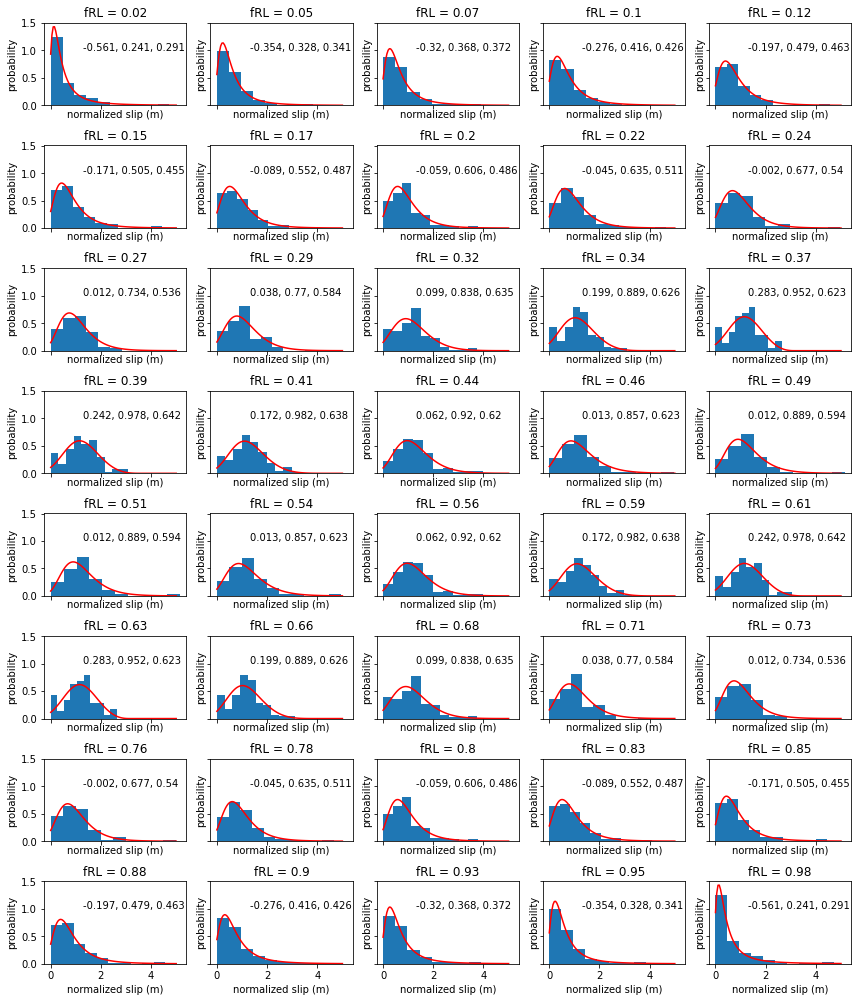

In [3]:
par_shp = []
par_loc = []
par_scl = []

# get distribution for a point
x = np.linspace(0.0,5,100) 

fig, axs = plt.subplots(8, 5, figsize=(12,14), sharex=True, sharey=True)
ii =-1
jj=-1
for i in range(ngridpoints):
    jj = jj+1
    if jj%5==0:
        ii =ii+1
        jj=0
    
    si = slips[:,i]
    axs[ii,jj].hist(si, density=True)
    fit = gev.fit(si)
    # fit returns MLE estimates of the shape, location, scale parameters
    # Also, note that the results from scipy.stats and MATLAB differs in 
    # the sign of shape parameter  
    par_shp.append(fit[0])
    par_loc.append(fit[1])
    par_scl.append(fit[2])
    y = gev.pdf(x, fit[0], loc=fit[1], scale=fit[2])
    
    axs[ii,jj].plot(x, y, 'r-')
    strlab = str(round(fit[0], 3)) +  ", " + str(round(fit[1],3)) + ", " + str(round(fit[2],3))
    axs[ii,jj].text(1.3,1, strlab)
    axs[ii, jj].set_title("fRL = "+ str(round(normx[i],2)))
    axs[ii,jj].set_xlabel('normalized slip (m)')
    axs[ii,jj].set_ylabel('probability');
    fig.tight_layout(pad=1.0)
    
    # plt.figure(figsize=(3, 3))
    # print(str(round(normx[i],2)), ii, jj)



<b>Figure 1 </b>. Distribution of surface slip:  Histograms of normalised surface slip extracted from  surface-slip profiles at along-strike locations(indicated as fraction of rupture length fRL, normalized such that rupture length = 1) superimposed by the fitting GEV distribution. The corresponding maximum likelihood estimates of the shape, location and scale parameters of the fitting distribution are annotated.

It can be clearly observed that the PDF is function of location on the rupture profile. 

In [4]:
# candidate models
def myexpon(x, a, b):
    return (a-np.exp(b*(x)))

def mypow(x, a, b):
    return ((b*(x**a)))

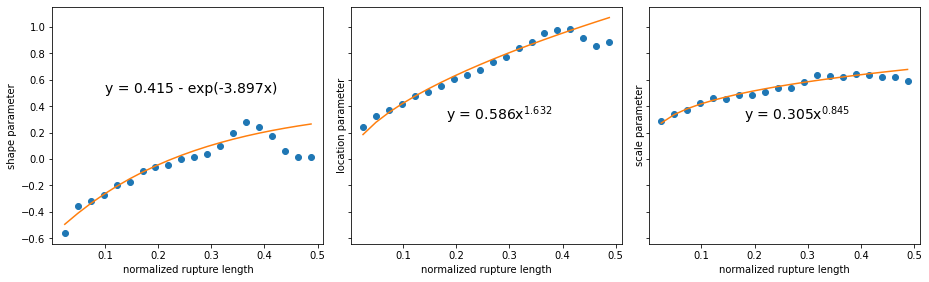

In [5]:
# shape, location, scale parameters in this order
fig, axs = plt.subplots(1, 3, figsize=(13,4), sharex=True, sharey=True)

axs[0].plot(normx[0:20], par_shp[0:20], 'o');
pars, cov = curve_fit(f=myexpon, xdata=normx[0:16], ydata=par_shp[0:16], p0=[0, 0], bounds=([-np.inf, np.inf]))
y = myexpon(normx[0:20], pars[0], pars[1])
axs[0].plot(normx[0:20], y, '-')
# a-np.exp(b*(x))
strlab = "y = " + str(round(pars[0],3)) + " - exp(" + str(round(pars[1],3))+"x)"
axs[0].text(0.1, 0.5, strlab, fontsize=14);
axs[0].set_xlabel('normalized rupture length');
axs[0].set_ylabel('shape parameter');


axs[1].plot(normx[0:20], par_loc[0:20], 'o');
pars, cov = curve_fit(f=mypow, xdata=normx[0:16], ydata=par_loc[0:16], p0=[0, 0], bounds=([-np.inf, np.inf]))
y = mypow(normx[0:20], pars[0], pars[1])
axs[1].plot(normx[0:20], y, '-')

strlab = "y = " + str(round(pars[0],3)) + "x$^{" + str(round(pars[1],3))+"}$"
axs[1].text(0.18, 0.3, strlab, fontsize=14)
axs[1].set_xlabel('normalized rupture length');
axs[1].set_ylabel('location parameter');


axs[2].plot(normx[0:20], par_scl[0:20], 'o');
pars, cov = curve_fit(f=mypow, xdata=normx[0:16], ydata=par_scl[0:16], p0=[0, 0], bounds=([-np.inf, np.inf]))
y = mypow(normx[0:20], pars[0], pars[1])
axs[2].plot(normx[0:20], y, '-')
strlab = "y = " + str(round(pars[0],3)) + "x$^{" + str(round(pars[1],3))+"}$"
axs[2].text(0.18, 0.3, strlab, fontsize=14)
axs[2].set_xlabel('normalized rupture length');
axs[2].set_ylabel('scale parameter');
fig.tight_layout(pad=1)

<b> Figure 2. </b> GEV parameters as function of location on profile: The fitted functions are depicted by the lines and also, annotated on each plot.

In [7]:
def surfslipdist_gev(fRL):
    # check 
    if fRL <0 | fRL >1:
        print("not apprropiate input normalized location")
        return (None, None, None)
    if fRL> 0.5:
        fRL = 1.0-fRL
    pshape = 0.415-np.exp(-3.897*fRL)
    plocation = 0.586*(fRL**1.632)
    pscale = 0.305*(fRL**0.845)
    return(pshape, plocation, pscale)

### References

Mai PM, Thingbaijam KKS. (2014) SRCMOD: An online database of finite‐fault rupture models. Seismological Research Letters. 85(6):1348-1357. Also see, http://equake-rc.info/srcmod/

SciPy User Guide, https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_genextreme.html, last accessed: January 20, 2022. 

Thingbaijam  KKS,  Van  Dissen  RJ,  Shaw  BE,  Gerstenberger  MC. 2022. Average coseismic slip profiles. Lower Hutt (NZ):  GNS Science.33p. (GNS Science report; 2021/24). doi:10.21420/S6ED-JN06


